# DE27IM Class Tests

When written in binary, the 27 bit relationship contains 3 9-bit
parts corresponding to DE-9IM relationships. The left-most 9 bits
are the relationship between the second structure's contour and the
first structure's convex hull polygon. The middle 9 bits are the
relationship between the second structure's contour and the first
structure's exterior polygon (i.e. with any holes filled). The
right-most 9 bits are the relationship between the second
structure's contour and the first structure's contour.

Args:
    slice_structures (pd.DataFrame): A table of structures, where
        the values are the contours with type StructureSlice. The
        column index contains the roi numbers for the structures.
        The row index contains the slice index distances.

Returns:
    DE9IM_Type: An integer corresponding to a 27 bit binary value
        reflecting the combined DE-9IM relationship between contour2 and
        contour1's convex hull, exterior and polygon.

## Setup

### Imports

In [1]:
# Add src and Tests to sys.path for notebook imports
import sys
from pathlib import Path

root = Path.cwd().parent.parent.parent # Adjust if needed
src_path = root / "src"
tests_path = root / "Tests"
src_path

WindowsPath("d:/OneDrive - Queen's University/src")

In [2]:

if str(src_path) not in sys.path:
    sys.path.insert(0, str(src_path))
if str(tests_path) not in sys.path:
    sys.path.insert(0, str(tests_path))

In [3]:
# Shared Packages
import pandas as pd

# Local functions and classes
# Local functions and classes
from types_and_classes import *
from utilities import *
from contours import *
from contour_graph import *
from debug_tools import *
from region_slice import *
from relations import *

### Global Settings

In [4]:
PRECISION = 2

In [5]:
%matplotlib inline

In [6]:
box10x5 = box_points(10,5)
circle4_left = circle_points(2, offset_x=-3)
circle3_right = circle_points(1.5, offset_x=3)
circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
circle2_right = circle_points(1, offset_x=3)
slice_data = [
    ContourPoints(box10x5, roi=0, slice_index=1.0),
    ContourPoints(circle4_left, roi=0, slice_index=1.0),
    ContourPoints(circle3_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_left, roi=1, slice_index=1.0)
    ]
contour_table, slice_sequence = build_contour_table(slice_data)
contour_table

,ROI,Slice,Points,Polygon,Area
0,0,1.0,"[(5.0, 2.5, 1.0), (5.0, -2.5, 1.0), (-5.0, -2....","POLYGON Z ((5 2.5 1, 5 -2.5 1, -5 -2.5 1, -5 2...",50.000000
1,0,1.0,"[(-3.0, 2.0, 1.0), (-2.235, 1.848, 1.0), (-1.5...","POLYGON Z ((-3 2 1, -2.235 1.848 1, -1.586 1.4...",12.245448
2,0,1.0,"[(3.0, 1.5, 1.0), (3.574, 1.386, 1.0), (4.061,...","POLYGON Z ((3 1.5 1, 3.574 1.386 1, 4.061 1.06...",6.890128
3,0,1.0,"[(3.0, 1.0, 1.0), (3.383, 0.924, 1.0), (3.707,...","POLYGON Z ((3 1 1, 3.383 0.924 1, 3.707 0.707 ...",3.061948
4,1,1.0,"[(-3.0, 1.5, 1.0), (-2.617, 1.424, 1.0), (-2.2...","POLYGON Z ((-3 1.5 1, -2.617 1.424 1, -2.293 1...",3.061948


In [7]:
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)


In [8]:
lookup = build_contour_lookup(contour_graph_a)
lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
0,0,1.0,None,False,False,0,0A,"(0, 1.0, 0)"
1,0,1.0,Unknown,False,False,1,0B,"(0, 1.0, 1)"
2,0,1.0,Unknown,False,False,2,0C,"(0, 1.0, 2)"
3,0,1.0,None,False,False,3,0D,"(0, 1.0, 3)"


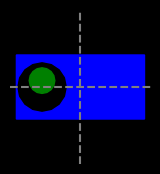

In [9]:
box10x5 = box_points(10,5)
circle4_left = circle_points(2, offset_x=-3)
circle3_right = circle_points(1.5, offset_x=3)
circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
circle2_right = circle_points(1, offset_x=3)
slice_data = [
    ContourPoints(box10x5, roi=0, slice_index=1.0),
    ContourPoints(circle4_left, roi=0, slice_index=1.0),
    ContourPoints(circle3_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_left, roi=1, slice_index=1.0)
    ]
contour_table, slice_sequence = build_contour_table(slice_data)
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)
lookup = build_contour_lookup(contour_graph_a)
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)
ax = plot_ab(a.regions['0A'], b.regions['1A'])
plt.show()

In [10]:
contour_lookup = build_contour_lookup(contour_graph_a)

contour_lookup.loc[contour_lookup.ROI==0, ['SliceIndex', 'HoleType', 'Label']]

,SliceIndex,HoleType,Label
0,1.0,None,"(0, 1.0, 4)"
1,1.0,Unknown,"(0, 1.0, 5)"
2,1.0,Unknown,"(0, 1.0, 6)"
3,1.0,None,"(0, 1.0, 7)"


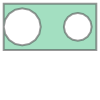

In [11]:
selected_label = contour_lookup.Label.iloc[0]
this_contour = contour_graph_a.nodes(data=True)[selected_label]['contour']
this_contour.polygon_with_holes

In [12]:
a.regions

{'0A': <MULTIPOLYGON Z (((-5 -2.5 1, -5 0 1, -5 2.5 1, 5 2.5 1, 5 -2.5 1, -5 -2.5 1...>}

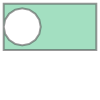

In [13]:
[r for r in a.regions.values()][0]

In [14]:
c_list = [r for r in a.embedded_regions.values()][0]
c_list


In [15]:
poly_list = [c.polygon for c in c_list]
poly_list

[<POLYGON Z ((-3 2 1, -2.235 1.848 1, -1.586 1.414 1, -1.152 0.765 1, -1 0 1,...>]

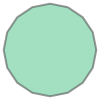

In [16]:

shapely.union_all(poly_list)

In [17]:

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())


|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|

Relationship: Surrounds


In [18]:
box10x5 = box_points(10,5)
slice_data = [ContourPoints(box10x5, roi=0, slice_index=1.0)]
contour_table, slice_sequence = build_contour_table(slice_data)

graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)


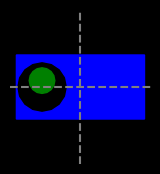

|001|	|111|	|111|
|001|	|001|	|001|
|111|	|001|	|001|

Relationship: Surrounds


In [19]:
def surrounds_example3():
    box10x5 = box_points(10,5)
    circle4_left = circle_points(2, offset_x=-3)
    circle3_right = circle_points(1.5, offset_x=3)
    circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
    circle2_right = circle_points(1, offset_x=3)
    slice_data = [
        ContourPoints(box10x5, roi=0, slice_index=1.0),
        ContourPoints(circle4_left, roi=0, slice_index=1.0),
        ContourPoints(circle3_right, roi=0, slice_index=1.0),
        ContourPoints(circle2_right, roi=0, slice_index=1.0),
        ContourPoints(circle2_left, roi=1, slice_index=1.0),
        ]
    contour_table, slice_sequence = build_contour_table(slice_data)
    contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                        slice_sequence,
                                                        roi=0)
    contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                        slice_sequence,
                                                        roi=1)
    region_slice_a = RegionSlice(contour_graph_a, slice_index=1.0)
    region_slice_b = RegionSlice(contour_graph_b, slice_index=1.0)
    return region_slice_a, region_slice_b


a, b = surrounds_example3()
ax = plot_ab(a.regions['0A'], b.regions['1A'])
plt.show()

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())


In [20]:
lookup = build_contour_lookup(contour_graph_a)
lookup

,ROI,SliceIndex,HoleType,Interpolated,Boundary,ContourIndex,RegionIndex,Label
0,0,1.0,None,False,False,4,0A,"(0, 1.0, 4)"
1,0,1.0,Unknown,False,False,5,0B,"(0, 1.0, 5)"
2,0,1.0,Unknown,False,False,6,0C,"(0, 1.0, 6)"
3,0,1.0,None,False,False,7,0D,"(0, 1.0, 7)"


In [21]:
box10x5 = box_points(10,5)
circle4_left = circle_points(2, offset_x=-3)
circle3_right = circle_points(1.5, offset_x=3)
circle2_left = circle_points(1, offset_x=-3, offset_y=0.5)
circle2_right = circle_points(1, offset_x=3)
slice_data = [
    ContourPoints(box10x5, roi=0, slice_index=0.0),
    ContourPoints(box10x5, roi=0, slice_index=1.0),
    ContourPoints(box10x5, roi=0, slice_index=2.0),

    ContourPoints(circle4_left, roi=0, slice_index=0.0),
    ContourPoints(circle4_left, roi=0, slice_index=1.0),
    ContourPoints(circle4_left, roi=0, slice_index=2.0),

    ContourPoints(circle3_right, roi=0, slice_index=0.0),
    ContourPoints(circle3_right, roi=0, slice_index=1.0),
    ContourPoints(circle3_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_right, roi=0, slice_index=0.0),
    ContourPoints(circle2_right, roi=0, slice_index=1.0),
    ContourPoints(circle2_right, roi=0, slice_index=2.0),

    ContourPoints(circle2_left, roi=1, slice_index=0.0),
    ContourPoints(circle2_left, roi=1, slice_index=1.0),
    ContourPoints(circle2_left, roi=1, slice_index=2.0)

]

contour_table, slice_sequence = build_contour_table(slice_data)

contour_graph = nx.Graph()
roi=0
contour_by_slice = build_contours(contour_table, roi)
for contour_data in contour_by_slice.values():
        for contour in contour_data:
            contour_label = contour.index
            contour_graph.add_node(contour_label, contour=contour)
contour_graph = add_graph_edges(contour_graph, slice_sequence)

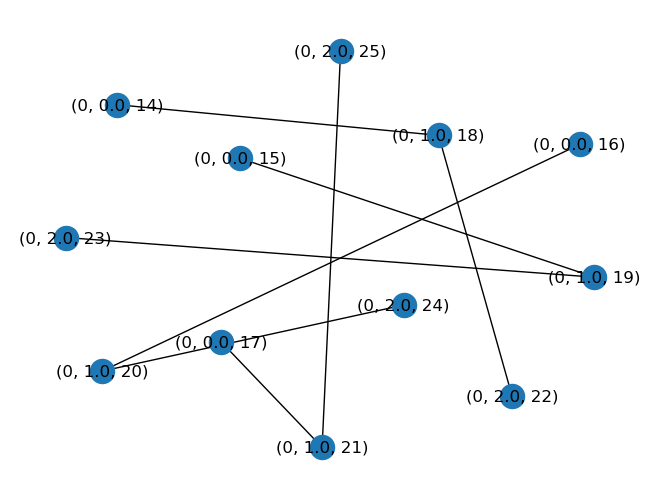

In [22]:
nx.draw(contour_graph, with_labels=True,
           pos=nx.arf_layout(contour_graph))
plt.show()

In [23]:
contour_lookup = build_contour_lookup(contour_graph)

contour_lookup.loc[contour_lookup.ROI==0, ['SliceIndex', 'HoleType', 'Label']]

,SliceIndex,HoleType,Label
0,0.0,None,"(0, 0.0, 14)"
1,0.0,Unknown,"(0, 0.0, 15)"
2,0.0,Unknown,"(0, 0.0, 16)"
3,0.0,None,"(0, 0.0, 17)"
4,1.0,None,"(0, 1.0, 18)"
5,1.0,Unknown,"(0, 1.0, 19)"
6,1.0,Unknown,"(0, 1.0, 20)"
7,1.0,None,"(0, 1.0, 21)"
8,2.0,None,"(0, 2.0, 22)"
9,2.0,Unknown,"(0, 2.0, 23)"


# ERROR Using degree = 1 to identify boundaries will miss cases where there is a bifurcation in the contour.

In [24]:
[(node, degree) for node, degree in contour_graph.degree()]

[((0, 0.0, 14), 1),
 ((0, 0.0, 15), 1),
 ((0, 0.0, 16), 1),
 ((0, 0.0, 17), 1),
 ((0, 1.0, 18), 2),
 ((0, 1.0, 19), 2),
 ((0, 1.0, 20), 2),
 ((0, 1.0, 21), 2),
 ((0, 2.0, 22), 1),
 ((0, 2.0, 23), 1),
 ((0, 2.0, 24), 1),
 ((0, 2.0, 25), 1)]

In [25]:
boundary_nodes = {node for node, degree in contour_graph.degree()
                    if degree == 1}
boundary_nodes

{(0, 0.0, 14),
 (0, 0.0, 15),
 (0, 0.0, 16),
 (0, 0.0, 17),
 (0, 2.0, 22),
 (0, 2.0, 23),
 (0, 2.0, 24),
 (0, 2.0, 25)}

- Crashing here because a boundary contour was already created for a contour and then it tries to create a second boundary contour for the same contour.

In [ ]:
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)


In [27]:
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)


In [29]:
a.regions

{'0A': <MULTIPOLYGON Z (((-5 2.5 1, 5 2.5 1, 5 -2.5 1, -5 -2.5 1, -5 2.5 1), (1.614...>}

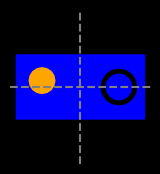

In [28]:
ax = plot_ab(a.regions['0A'], b.regions['1A'])


In [ ]:

a, b = surrounds_example3()


InvalidSlice: Without interpolated_slice, starting_contour must reference a boundary slice.

In [ ]:
def surrounds_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle5, circle2])
    b = StructureSlice([circle4, circle3])
    return a, b

In [ ]:

circle6 = circle_points(3)
circle5 = circle_points(2.5)
circle4 = circle_points(2)
circle3 = circle_points(1.5)
circle2 = circle_points(1)
slice_data = [
    ContourPoints(circle6, roi=0, slice_index=0.0),
    ContourPoints(circle6, roi=0, slice_index=1.0),
    ContourPoints(circle6, roi=0, slice_index=2.0),
    ContourPoints(circle5, roi=0, slice_index=0.0),
    ContourPoints(circle5, roi=0, slice_index=1.0),
    ContourPoints(circle5, roi=0, slice_index=2.0),
    ContourPoints(circle2, roi=0, slice_index=0.0),
    ContourPoints(circle2, roi=0, slice_index=1.0),
    ContourPoints(circle2, roi=0, slice_index=2.0),
    ContourPoints(circle4, roi=1, slice_index=0.0),
    ContourPoints(circle4, roi=1, slice_index=1.0),
    ContourPoints(circle4, roi=1, slice_index=2.0),
    ContourPoints(circle3, roi=1, slice_index=0.0),
    ContourPoints(circle3, roi=1, slice_index=1.0),
    ContourPoints(circle3, roi=1, slice_index=2.0),
]
contour_table, slice_sequence = build_contour_table(slice_data)
contour_graph_a, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=0)
contour_graph_b, slice_sequence = build_contour_graph(contour_table,
                                                    slice_sequence,
                                                    roi=1)
a = RegionSlice(contour_graph_a, slice_index=1.0)
b = RegionSlice(contour_graph_b, slice_index=1.0)


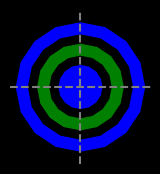

In [ ]:
ax = plot_ab(a.regions['0A'], b.regions['1A'])


In [ ]:

r = DE27IM(a,b)

print(str(r))
print(r.identify_relation())


|001|	|001|	|111|
|001|	|001|	|001|
|111|	|111|	|001|

Relationship: Shelters


In [ ]:
def shelters_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4_offset = shapely.Polygon(circle_points(2, offset_x=3.5))
    shell = shapely.difference(circle6, circle5)
    cove = shapely.difference(shell, circle4_offset)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1))

    a = StructureSlice([cove])
    b = StructureSlice([circle2])
    return a, b

a, b = shelters_example()
ax = plot_ab(a.contour, b.contour)

r = DE27IM(a,b)
print(str(r))
print(r.identify_relation())

In [ ]:
poly_a = shapely.Polygon(circle_points(2))
poly_b = shapely.Polygon(circle_points(2))
relation = DE9IM(poly_a, poly_a)
print(relation)
relation

In [ ]:
relation_str = '111000000111000000111000000'
relation_str[9:]

In [ ]:
box6 = shapely.MultiPolygon([shapely.Polygon(box_points(6))])
box4 = shapely.MultiPolygon([shapely.Polygon(box_points(4))])
relation = DE9IM(box4, box6)
boundary_relation = relation.boundary_adjustment('b')
print(boundary_relation)
boundary_relation

In [ ]:
relation_str = '111000000111000000111000000'
de27im = DE27IM(relation_str=relation_str)

In [ ]:
DE27IM.test_binaries[7].relation_type


In [ ]:
v = DE27IM.test_binaries[7].mask - DE27IM.test_binaries[7].value
v = DE27IM.test_binaries[7].value
de27im = DE27IM(relation_int=v)
de27im.identify_relation()

## Adjusting Boundary Slice Relations

For the beginning and ending slices of a structure the entire contour must
be treated as a boundary.  The structure does not have an interior on these
slices. In this case the “*Interior*” relations become “*Boundary*” relations.

The “*Interior*” bits of the DE-9IM relationship metric are combined with the 
“*Boundary*” bits using "OR" logic.  This keeps the “*Boundary*” bits as 
part of the boundary.

Possible boundary adjustment types are:

<link rel="stylesheet" href="relations.css">
<ul>
<li>The <span class="a">a</span> polygon is from a boundary slice</li>
<li>The <span class="b">b</span> polygon is from a boundary slice</li>
<li>Both the <span class="a">a</span> polygon and 
<span class="b">b</span> polygons are from a boundary slice</li>
</ul>


In [ ]:
def surrounds_example2():
    circle6 = shapely.Polygon(circle_points(3))
    circle5 = shapely.Polygon(circle_points(2.5))
    circle4 = shapely.Polygon(circle_points(2))
    circle3 = shapely.Polygon(circle_points(1.5))
    circle2 = shapely.Polygon(circle_points(1))

    a = StructureSlice([circle6, circle5, circle2])
    b = StructureSlice([circle4, circle3])
    return a, b

In [ ]:
a, b = surrounds_example2()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)

**Original**<br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FF2 | 212 | 212 |
| FF1 | FF1 | FF1 |
| 212 | FF2 | FF2 |

`('FF2FF1212','212FF1FF2','212FF1FF2')`<br>


**Boundary A Adjustment**<br>
<img src="../../Images/Boundaries/a interior to boundary.png" style="height:150px;"/><br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FFF | FFF | FFF |
| FF2 | 212 | 212 |
| 212 | FF2 | FF2 |


`('FFFFF2212','FFF212FF2','FFF212FF2')`<br>
(<DE9IM>: FFFFF2212, <DE9IM>: FFF212FF2, <DE9IM>: FFF212FF2)

**Boundary B Adjustment**<br>
<img src="../../Images/Boundaries/b interior to boundary.png" style="height:150px;"/><br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FF2 | F22 | F22 |
| FF1 | FF1 | FF1 |
| F22 | FF2 | FF2 |

`('FF2FF1F22','F22FF1FF2','F22FF1FF2')`<br>


**Both Boundary Adjustments**<br>
<img src="../../Images/Boundaries/a and b interior to boundary.png" style="height:150px;"/><br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FFF | FFF | FFF |
| FF2 | F22 | F22 |
| F22 | FF2 | FF2 |

`('FFFFF2F22','FFFF22FF2','FFFF22FF2')`<br>


In [ ]:
initial_relation_group = (DE9IM(relation_str='FF2FF1212'),
                          DE9IM(relation_str='212FF1FF2'),
                          DE9IM(relation_str='212FF1FF2'))
print(f'Initial Relation:\t\t\t{initial_relation_group}')

boundary_a_adjustment = (DE9IM(relation_str='FFFFF2212'),
                         DE9IM(relation_str='FFF212FF2'),
                         DE9IM(relation_str='FFF212FF2'))

print(f'After Boundary A Adjustment:\t\t{boundary_a_adjustment}')

boundary_b_adjustment = (DE9IM(relation_str='FF2FF1F22'),
                         DE9IM(relation_str='F22FF1FF2'),
                         DE9IM(relation_str='F22FF1FF2'))
print(f'After Boundary B Adjustment:\t\t{boundary_b_adjustment}')

both_boundary_adjustments = (DE9IM(relation_str='FFFFF2F22'),
                             DE9IM(relation_str='FFFF22FF2'),
                             DE9IM(relation_str='FFFF22FF2'))
print(f'After Both Boundary Adjustments:\t{both_boundary_adjustments}')


In [ ]:
de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['boundary_a'])
boundary_a_adjustment = (DE9IM(relation_str='FFFFF2212'),
                         DE9IM(relation_str='FFF212FF2'),
                         DE9IM(relation_str='FFF212FF2'))
print(adjusted_de27im)
print(boundary_a_adjustment)
assert adjusted_de27im == boundary_a_adjustment

In [ ]:
de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['boundary_b'])
boundary_b_adjustment = (DE9IM(relation_str='FF2FF1F22'),
                         DE9IM(relation_str='F22FF1FF2'),
                         DE9IM(relation_str='F22FF1FF2'))
print(adjusted_de27im)
print(boundary_b_adjustment)
assert adjusted_de27im == boundary_b_adjustment

In [ ]:
de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['boundary_a', 'boundary_b'])
both_boundary_adjustments = (DE9IM(relation_str='FFFFF2F22'),
                             DE9IM(relation_str='FFFF22FF2'),
                             DE9IM(relation_str='FFFF22FF2'))
print(adjusted_de27im)
print(both_boundary_adjustments)
assert adjusted_de27im == both_boundary_adjustments

## Correcting for Holes

In some cases a relation may be generated for a polygon that is represents a hole (void) in a larger polygon. 

In this case,  the the interior of a hole is the exterior of the structure, but 
the exterior of a hole is undefined. It may or may not be within the interior 
of the larger polygon.

- “*Interior*” relations become “*Exterior*” relations 
- “*Exterior*” relations become “**F**” relations.

- When hole boundaries are tested, only the "contour" “*Boundary*” bits of
    the `DE27IM` relationship are used.  The external and hull bits are set to `'FFFFFFFFF'`.

In [ ]:
def shelters_circle():
    circle6 = shapely.Polygon(circle_points(3))
    circle3 = shapely.Polygon(circle_points(1.5, offset_x=1.6))
    crescent = shapely.difference(circle6, circle3)
    circle2 = shapely.Polygon(circle_points(1, offset_x=1.5))

    a = StructureSlice([crescent])
    b = StructureSlice([circle2])
    return a, b

In [ ]:
a, b = shelters_circle()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)

**Original**<br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FF2 | FF2 | 212 |
| FF1 | FF1 | FF1 |
| 212 | 212 | FF2 |

`('FF2FF1212','FF2FF1212','212FF1FF2')`<br>

**Hole A Adjustment**<br>
<img src="..\..\Images\Boundaries\Correction for A as Hole.png" style="height:150px;"/><br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FFF | FFF | FFF |
| FF1 | FFF | FFF |
| FF2 | FFF | FFF |

**Note:** The exterior and hull relations are not used for hole adjustments.

`('FFFFFFF2','FFFFFFFFF','FFFFFFFFF')`<br>
`('FFFFF1FF2','FFFFFFFFF','FFFFFFFFF')`<br>


**Hole B Adjustment**<br>
<img src="../../Images/Boundaries/b interior to boundary.png" style="height:150px;"/><br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| FFF | FFF | FFF |
| FFF | FFF | FFF |
| F12 | FFF | FFF |

`('FFFFFFF12','FFFFFFFFF','FFFFFFFFF')`<br>


In [ ]:
initial_relation_group = (DE9IM(relation_str='FF2FF1212'),
                          DE9IM(relation_str='FFFFFFFFF'),
                          DE9IM(relation_str='FFFFFFFFF'))

de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['hole_a'])
hole_a_adjustment = (DE9IM(relation_str='FFFFF1FF2'),
                     DE9IM(relation_str='FFFFFFFFF'),
                     DE9IM(relation_str='FFFFFFFFF'))
print(adjusted_de27im)
print(hole_a_adjustment)
assert adjusted_de27im == hole_a_adjustment

In [ ]:
initial_relation_group = (DE9IM(relation_str='FF2FF1212'),
                          DE9IM(relation_str='FFFFFFFFF'),
                          DE9IM(relation_str='FFFFFFFFF'))

de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['hole_b'])
hole_b_adjustment = (DE9IM(relation_str='FFFFFFF12'),
                     DE9IM(relation_str='FFFFFFFFF'),
                     DE9IM(relation_str='FFFFFFFFF'))
print(adjusted_de27im)
print(hole_b_adjustment)
assert adjusted_de27im == hole_b_adjustment

## Transposed Relations

Currently, relationships are defined and tested assuming that the first 
   structure is the same size or larger in volume than the second structure.
   However, when testing boundaries, the first contour is assumed to be on a 
   boundary slice.  If the boundary being tested is a boundary of the second
    structure, the relationship must be transposed before being combined with 
    the other relation values.

> `shapely.relate(poly_a, poly_b)` $\equiv$ `shapely.relate(poly_a, poly_b).T`


In [ ]:
def simple_contains_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    a = StructureSlice([circle6])
    b = StructureSlice([circle4])
    return a, b


In [ ]:
a, b = simple_contains_example()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)

**Original**<br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| 212 | 212 | 212 |
| FF1 | FF1 | FF1 |
| FF2 | FF2 | FF2 |

`('212FF1FF2', '212FF1FF2', '212FF1FF2')`<br>

**Transpose**<br>
|Contour|Exterior|Hull|
|-----|-----|-----|
| 2FF | 2FF | 2FF |
| 1FF | 1FF | 1FF |
| 212 | 212 | 212 |


`('2FF1FF212', '2FF1FF212', '2FF1FF212')`<br>


In [ ]:
initial_relation_group = (DE9IM(relation_str='212FF1FF2'),
                          DE9IM(relation_str='212FF1FF2'),
                          DE9IM(relation_str='212FF1FF2'))

de27im = DE27IM(relation_int=0)
adjusted_de27im = de27im.apply_adjustments(initial_relation_group,
                                           ['transpose'])
transpose_adjustment = (DE9IM(relation_str='2FF1FF212'),
                        DE9IM(relation_str='2FF1FF212'),
                        DE9IM(relation_str='2FF1FF212'))
print(adjusted_de27im)
print(transpose_adjustment)
assert adjusted_de27im == transpose_adjustment

In [ ]:
def confines_ring_example():
    circle6 = shapely.Polygon(circle_points(3))
    circle4 = shapely.Polygon(circle_points(2))
    circle2 = shapely.Polygon(circle_points(1))

    # b has internal borders with the ring portion of a, but has an external
    # border with the island part of a. The internal borders relation wins.
    a = StructureSlice([circle6, circle4, circle2])
    b = StructureSlice([circle4, circle2])
    return a, b

In [ ]:
a, b = confines_ring_example()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)

('
 FF2
 F11
 2F2
 
 ', '
 
 212
 FF1
 FF2
 
 ', '
 
 212
 FF1
 FF2
 
 ')

('
FF2
F11
2F2
', '
212
FF1
FF2
', '
212
FF1
FF2
')

In [ ]:
a, b = surrounds_example2()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)

In [ ]:
a, b = shelters_circle()
plot_ab(a.contour, b.contour)
contour = a.contour.relate(b.contour)
external = a.exterior.relate(b.contour)
convex_hull = a.hull.relate(b.contour)
relation_group = (contour, external, convex_hull)
print(relation_group)